In [13]:
import pandas as pd
import math 
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from deepdiff import DeepDiff

In [6]:
df = pd.read_csv (r'./normales.csv')
print(df.shape)
df = df.to_numpy()

(46, 2)


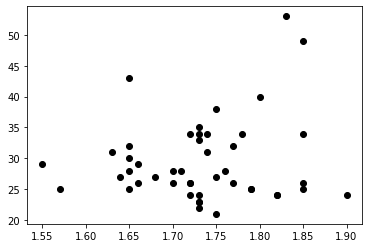

In [12]:
plt.plot(df[:,0], df[:,1], 'o', color='black')

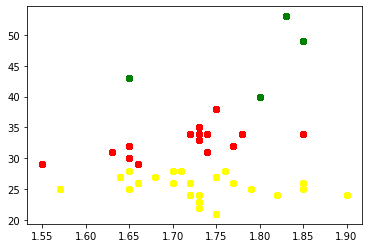

In [11]:
fc = np.array(test[0])
sc = np.array(test[1])
tc = np.array(test[2])

plt.plot(fc[:,0], fc[:,1], 'o', color='green')
plt.plot(sc[:,0], sc[:,1], 'o', color='yellow')
plt.plot(tc[:,0], tc[:,1], 'o', color='red')
plt.show()

In [10]:
test = kmeans(3, df)

In [9]:
def kmeans(K, x):
    
    k = K
    samples = len(x)
    clusters = {}
    centroids = {}

    ##initiating centroids
    centroids_index = random.sample(range(0, samples), k)
    for i in range(k):
        centroids[i] = x[centroids_index[i]]
        clusters[i] = []

    #print("Initial Centroids: ")
    #print(centroids)  
    
    for l in range(1000):          

        for data in x:
            euc_dist = []
            for j in range(k):
                euc_dist.append(np.linalg.norm(data - centroids[j]))
            clusters[euc_dist.index(min(euc_dist))].append(data)
        
        centroids_aux = recalculate_centroids(centroids, clusters, k)
        ##print(centroids_aux)
        
        ##CHEQUEAR SI SON DIFERENTES LOS CENTROIDES RECALCULADOS
        diff = DeepDiff(centroids, centroids_aux)
        
        if(diff):
            centroids = centroids_aux
        else: 
            print("reached convergence.." + str(l))
            break 
            
    return clusters 


In [261]:
def calculateDistance(x1,x2):
    dist = math.sqrt((x2[0]- x1[0])**2 + (x2[1] - x1[1])**2)
    return dist

In [8]:
def recalculate_centroids(c, clusters, k):
    """ Recalculates the centroid position based on the plot """
    caux = c.copy()
    
    for i in range(k):
        caux[i] = np.average(clusters[i], axis=0)
    return caux

In [18]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df)
y_kmeans = kmeans.predict(df)

plt.scatter(df[:, 0], df[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

array([0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2,
       0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 1, 0, 0, 0, 0, 1, 0, 2, 2, 1,
       0, 0], dtype=int32)